In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Задание 1

---

Напишите функцию linan(), которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.


Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [2]:
coefficients = []
for i in range(2):
  coefficients.append(list(map(float, input().split())))

def linan(a11, a12, a21, a22, b1, b2):
  matrix = np.array([[a11, a12], [a21, a22]])
  vector = np.array([b1, b2])
  result = np.linalg.solve(matrix, vector)

  return str(result[0]) + " " + str(result[1])

a11, a12, a21, a22, b1, b2 = coefficients[0][0], coefficients[0][1], coefficients[1][0], coefficients[1][1], coefficients[0][2], coefficients[1][2]
linan(a11, a12, a21, a22, b1, b2)

3 -2 -6
5 1 3


'0.0 3.0'

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый результат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



Обратите внимание, что ожидается массив numpy

In [3]:
n = int(input("n = "))

def decorate_matrix(n):
  matrix = np.zeros((n, n))

  matrix[0] = [1] * n
  matrix[n - 1] = [1] * n

  row = [0] * (n - 2)
  row.append(1)
  row.insert(0, 1)

  matrix[1:n - 1] = row

  return matrix

decorate_matrix(n)

n = 5


array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример.
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [4]:
a = float(input("a = "))
b = float(input("b = "))

def f(x):
  return np.power((x + a), 2) - b

def g(x):
  return abs(f(x))

def bisection_method(function, left, right):
  precision = 1e-10

  while (right - left) / 2 > precision:
      middle = (right + left) / 2

      if function(middle + precision / 2) < function(middle - precision / 2):
          left = middle
      else:
          right = middle

  return (right + left) / 2

def scipy_method(function, start):
  return minimize(function, start).x

minimum_f = bisection_method(f, -100, 100)
minimum_g = bisection_method(g, -100, 100)

print('%.2f' % minimum_f, '%.2f' % minimum_g)

a = 3
b = 4
-3.00 -5.00


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

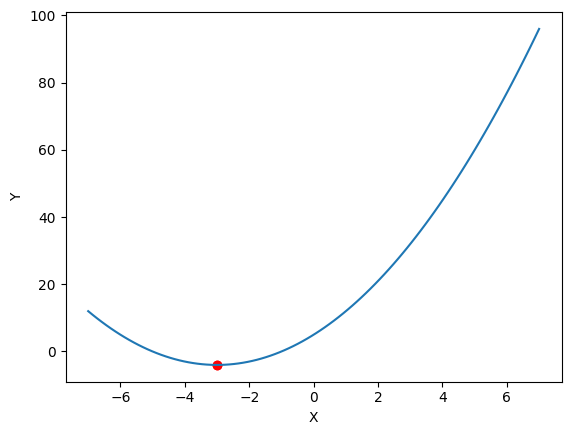

In [5]:
def plot_f():
  x = np.linspace(-7, 7, 100)
  y = list(map(f, x))

  plt.plot(x, y)
  plt.ylabel("Y")
  plt.xlabel("X")

  minimums = []
  minimums.append(scipy_method(f, 0))
  minimums.append(bisection_method(f, -100, 100))

  for minimum in minimums:
    plt.scatter([minimum], [f(minimum)], c = "red", alpha = 1)

  plt.show()

plot_f()

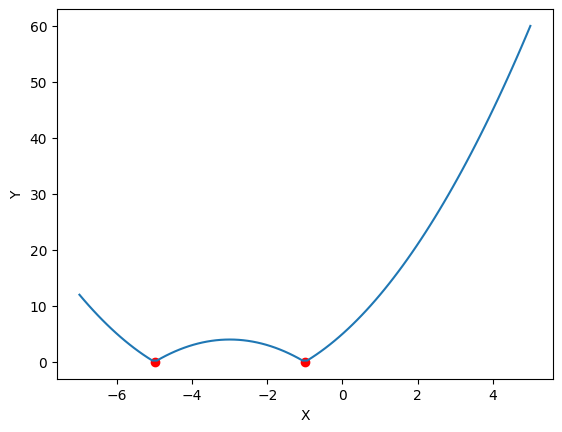

In [6]:
def plot_g():
  x = np.linspace(-7, 5, 100)
  y = list(map(g, x))

  plt.plot(x, y)
  plt.ylabel("Y")
  plt.xlabel("X")

  minimums = []
  minimums.append(scipy_method(g, 0))
  minimums.append(bisection_method(g, -100, 100))

  for minimum in minimums:
    plt.scatter([minimum], [g(minimum)], c = "red", alpha = 1)

  plt.show()

plot_g()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

## 1
1) Обозначим событие a — монетка выпала 10 раз подряд одной и той же стороной.
Вычислим вероятность p_a события а: нам не важно какой стороной выпала монетка
первый раз, но нужно, чтобы остальные 9 раз монетка выпала той же самой
стороной. Имеем: 1 * 0.5**9.

2) Далее найдём вероятность \_p_a противоположного _a события: для этого необходимо из 1 вычесть вероятность события a.

3) Теперь найдём вероятность _p того, что у всех человек монетка выпала не
одной и той же стороной: \_p_a**1000.

4) В итоге для определения вероятности того, что хотя бы у одного человека
монетка выпала 10 раз подряд одной и той же стороной, нужно из 1 вычесть
вероятность _p.

In [7]:
p_a = 1 * 0.5**9
_p_a = 1 - p_a
_p = _p_a**1000
p = 1 - _p

p

0.858440454732242

## 2
Обозначим событие a — монетка выпала 8 раз подряд одной и той же стороной.
Вычислим вероятность p_a события а, нам подходят события:<br>
   — когда монетка выпала одной и той же стороной ровно 8 раз подряд: таких вариантов 8;<br>
   — когда монетка выпала одной и той же стороной ровно 9 раз подряд: таких вариантов 6;<br>
   — когда монетка выпала одной и той же стороной ровно 10 раз подряд: таких вариантов 2.<br>

о о о о о о о о р р<br>
р о о о о о о о о р<br>
р р о о о о о о о о<br>
р о о о о о о о о о<br>
о р о о о о о о о о<br>
о о о о о о о о р о<br>
о о о о о о о о о р<br>
о о о о о о о о о о<br>

(+ аналогичные варианты для орла)

Всего вариантов выпадения монетки — 2\*\*10, значит вероятность p_a равна (6 + 8 + 2) / 2\*\*10

Далее действуем по аналогии с пунктами 2, 3, 4 задачи 1.

In [8]:
p_a = (6 + 8 + 2) / 2**10
_p_a = 1 - p_a
_p = _p_a**1000
p = 1 - _p

p

0.9999998552643654

## 3
1) По аналогии с пунктом 1 первой задачи имеем вероятность p_a.


2) Тогда вероятность того, что у троих человек монетка выпала 10 раз подряд
одной и той же стороной будет p_a**3.


3) У остальных 997 человек должно произойти противоположное _p_a
событие: (1 - p_a)**997.


4) Также необходимо учесть все комбинации, когда можно
расположить 3 человек среди 1000: 1000! / 997! * 3!

In [9]:
p_a = 1 * 0.5**9
p_a_3 = p_a**3
_p_a = 1 - p_a
_p_a_997 = _p_a**997
combinations = np.math.factorial(1000) / (np.math.factorial(1000 - 3) * np.math.factorial(3))
p = combinations * p_a_3 * _p_a_997

p

0.1762873858121736